In [3]:
# Support Vector Machine Code..
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Generate synthetic data
X, y = make_classification(
    n_samples=200,          # Number of samples
    n_features=2,           # Total features
    n_informative=2,        # Informative features
    n_redundant=0,          # Redundant features
    n_repeated=0,           # Repeated features
    n_classes=2,            # Number of classes
    n_clusters_per_class=1, # Clusters per class
    random_state=42         # Seed for reproducibility
)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hard Margin SVM (C is very large)
hard_margin_model = SVC(kernel='linear', C=1e6)
hard_margin_model.fit(X_train, y_train)
y_pred_hard = hard_margin_model.predict(X_test)

print("Hard Margin SVM:")
print(classification_report(y_test, y_pred_hard))

# Soft Margin SVM (C is small)
soft_margin_model = SVC(kernel='linear', C=0.1)
soft_margin_model.fit(X_train, y_train)
y_pred_soft = soft_margin_model.predict(X_test)

print("Soft Margin SVM:")
print(classification_report(y_test, y_pred_soft))


Hard Margin SVM:
              precision    recall  f1-score   support

           0       0.93      0.82      0.88        34
           1       0.80      0.92      0.86        26

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.88      0.87      0.87        60

Soft Margin SVM:
              precision    recall  f1-score   support

           0       0.93      0.82      0.88        34
           1       0.80      0.92      0.86        26

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.88      0.87      0.87        60



In [8]:
#  Using the manula Typing.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions


In [9]:
dataset = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\Github\005_Machine_Learning_Github\Machine_Learning_Fundamentals\010_Supervised_machine_learning\002_Classification_Learning/placement.csv")
dataset

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0
...,...,...,...
95,4.3,200,0
96,4.4,42,0
97,6.7,182,1
98,6.3,103,1


In [10]:
dataset.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

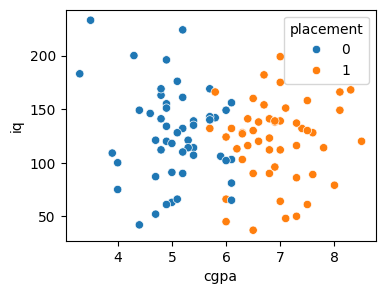

In [12]:
#  Is this linearly separable data or not..
plt.figure(figsize=(4,3))
sns.scatterplot(x = "cgpa", y = "iq", data= dataset, hue = "placement")
plt.show()

In [13]:
x = dataset.iloc[:, : -1]
y = dataset["placement"]

In [14]:
from sklearn.model_selection import train_test_split

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=12)

In [127]:
#  How to apply SVM.
from sklearn.svm import SVC

In [128]:
sv = SVC(kernel='linear')
sv.fit(x_train, y_train)

SVC(kernel='linear')

In [129]:
sv.score(x_test, y_test) * 100

90.0

In [130]:
sv.score(x_train, y_train) * 100

92.5

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


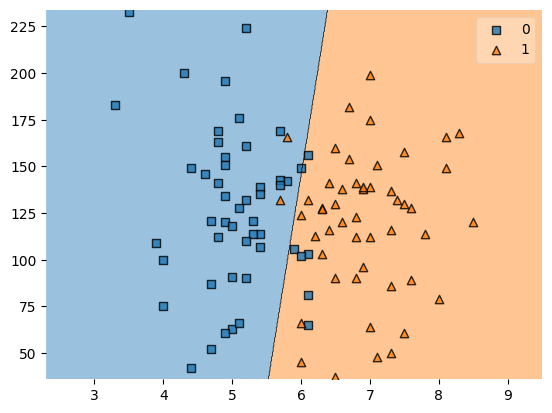

In [131]:
#  How to check the region.
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=sv)
plt.show()